# Final Project1: A Supervised Machine Learning Approach to Predict Vulnerability to Heart Disease

# Step 1:Collecting Data 

In [1]:
import pandas as pd  #import library
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
url='https://raw.githubusercontent.com/hasinroses/ML-Assignment/main/HeartDisease.csv'

In [3]:
df=pd.read_csv(url)

In [4]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [5]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


# Step2: Data Preprocessing

# 1. Understanding Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [8]:
df['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [9]:
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [10]:
df['AgeCategory'].nunique()

13

In [11]:
df['Race'].nunique()

6

In [12]:
df['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [13]:
df['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [14]:
df['GenHealth'].nunique()

5

# 2. Visualizing data

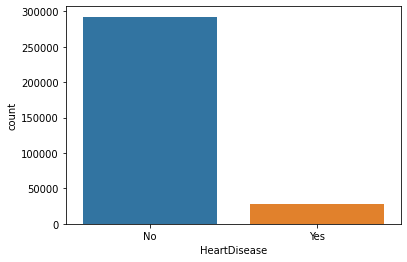

In [15]:
sns.countplot(df['HeartDisease'])

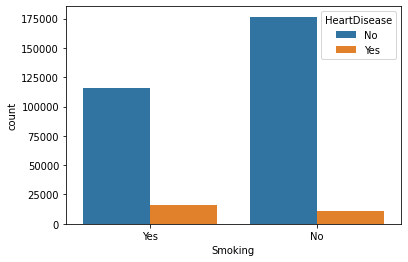

In [16]:
sns.countplot(x='Smoking',hue='HeartDisease',data=df)

<Figure size 720x1080 with 0 Axes>

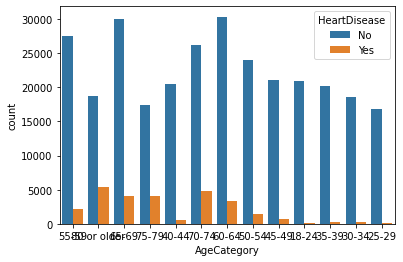

<Figure size 720x1080 with 0 Axes>

In [17]:
sns.countplot(x='AgeCategory',hue='HeartDisease',data=df)
plt.figure(figsize=(10,15))

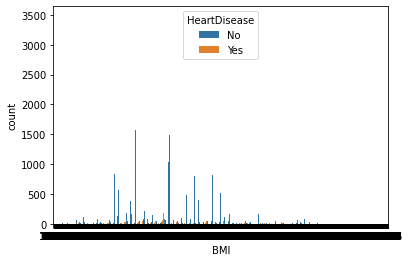

In [18]:
sns.countplot(x='BMI',hue='HeartDisease',data=df)

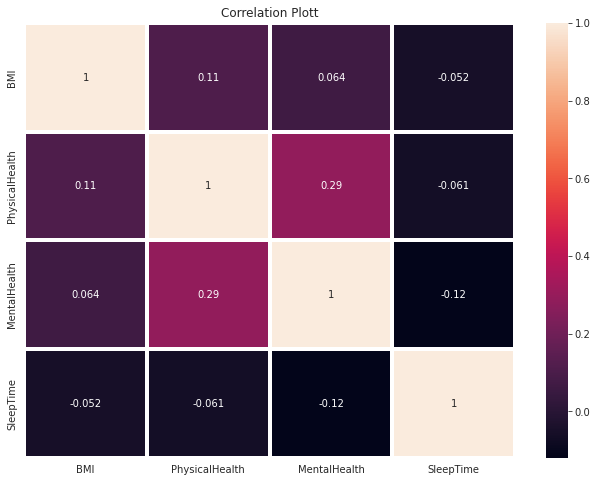

In [20]:
corr_set=sns.heatmap(df.corr(),annot=True,linewidths=3)
plt.title('Correlation Plott')
sns.set({'figure.figsize':(11,8)})
#plt.figure(figsize=(30,40),dpi=80)
plt.show()

# 3.Data Cleaning

In [21]:
# Since the dataset does not contain any NAN Value, Data Cleaning are not required

# 4. Feature Engineering: Encoding Categorical Data

In [23]:
cols=df.columns

In [24]:
from pandas.api.types import is_string_dtype
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
le=LabelEncoder()

In [25]:
#for col in cols:
 #   if is_string_dtype(df[col]):
   #     df[col]=le.fit_transform(df[col])

In [26]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [27]:
df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [28]:
cols=df.columns
col_binary_value=[]
for col in cols:
    if df[col].nunique()==2:
        col_binary_value.append(col)

In [29]:
for col in col_binary_value:
    df[col]=le.fit_transform(df[col])

In [30]:
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,55-59,White,Yes,1,Very good,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,80 or older,White,No,1,Very good,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,65-69,White,Yes,1,Fair,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,75-79,White,No,0,Good,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,40-44,White,No,1,Very good,8,0,0,0
5,1,28.87,1,0,0,6,0,1,0,75-79,Black,No,0,Fair,12,0,0,0
6,0,21.63,0,0,0,15,0,0,0,70-74,White,No,1,Fair,4,1,0,1
7,0,31.64,1,0,0,5,0,1,0,80 or older,White,Yes,0,Good,9,1,0,0
8,0,26.45,0,0,0,0,0,0,0,80 or older,White,"No, borderline diabetes",0,Fair,5,0,1,0
9,0,40.69,0,0,0,0,0,1,1,65-69,White,No,1,Good,10,0,0,0


In [31]:
oren=OrdinalEncoder()

In [32]:
df['AgeCategory']=oren.fit_transform(df[['AgeCategory']])

In [33]:
for col in df.columns:
    if is_string_dtype(df[col]):
        df[col]=oren.fit_transform(df[[col]])

In [34]:
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7.0,5.0,2.0,1,4.0,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12.0,5.0,0.0,1,4.0,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9.0,5.0,2.0,1,1.0,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11.0,5.0,0.0,0,2.0,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4.0,5.0,0.0,1,4.0,8,0,0,0
5,1,28.87,1,0,0,6,0,1,0,11.0,2.0,0.0,0,1.0,12,0,0,0
6,0,21.63,0,0,0,15,0,0,0,10.0,5.0,0.0,1,1.0,4,1,0,1
7,0,31.64,1,0,0,5,0,1,0,12.0,5.0,2.0,0,2.0,9,1,0,0
8,0,26.45,0,0,0,0,0,0,0,12.0,5.0,1.0,0,1.0,5,0,1,0
9,0,40.69,0,0,0,0,0,1,1,9.0,5.0,0.0,1,2.0,10,0,0,0


In [35]:
df['HeartDisease'].value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

# 5. Seperate X and Y

In [36]:
X=df.drop('HeartDisease',axis=1)

In [37]:
Y=df[['HeartDisease']]

In [38]:
Y

,HeartDisease
0,0
1,0
2,0
3,0
4,0
...,...
319790,1
319791,0
319792,0
319793,0


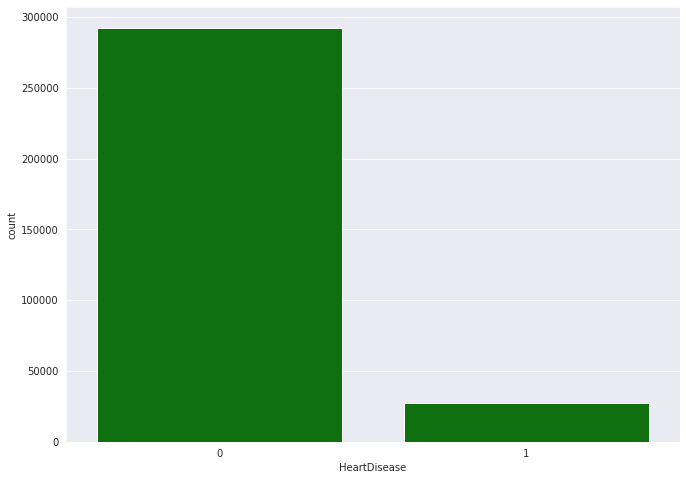

In [39]:
sns.countplot(df['HeartDisease'], color='green')

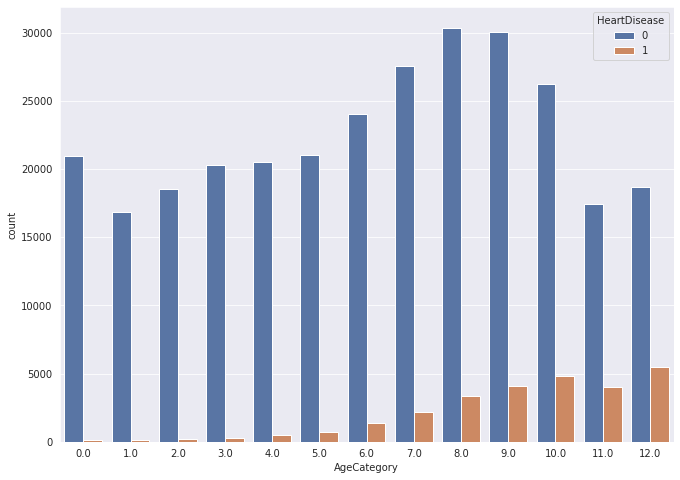

In [40]:
sns.countplot(x='AgeCategory',hue='HeartDisease',data=df)

# 6. Spliting Training  and Test Data

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [43]:
Y_train.value_counts()

HeartDisease
0               234055
1                21781
dtype: int64

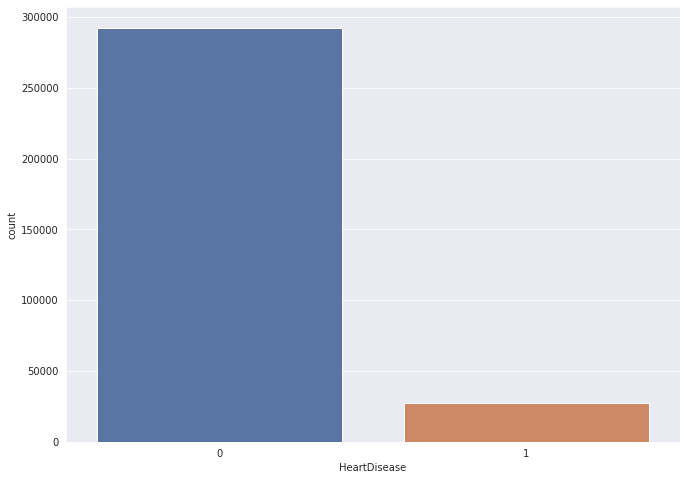

In [44]:
sns.countplot(df['HeartDisease'])

# 7.Handling Imbalance Dataset
Since Minority Class is only 8% so oversampling is required

In [45]:
from imblearn.combine import SMOTETomek

In [46]:
smtm=SMOTETomek()

In [47]:
Xsmt,Ysmt=smtm.fit_resample(X_train,Y_train)

In [48]:
Xsmt.shape

(465008, 17)

In [49]:
Ysmt.shape

(465008, 1)

In [50]:
Ysmt.value_counts()

HeartDisease
0               232504
1               232504
dtype: int64

In [ ]:
#from imblearn.over_sampling import SMOTE

In [ ]:
#smt=SMOTE()

In [ ]:
#Xsmt,Ysmt=smt.fit_resample(X_train,Y_train)

# Step3: Model Selection

In [51]:
from sklearn.tree import DecisionTreeClassifier
drclf=DecisionTreeClassifier()

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knnclf=KNeighborsClassifier()

In [53]:
from sklearn.linear_model import LogisticRegression
lrclf=LogisticRegression()

In [54]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators = 100)

In [55]:
from sklearn.ensemble import AdaBoostClassifier
adaclf = AdaBoostClassifier(random_state=1)

In [56]:
from xgboost import XGBClassifier
xgclf=XGBClassifier()

In [57]:
from sklearn.svm import SVC
svclf=SVC(kernel='rbf')

# Step4:Training the Model:

In [58]:
drclf.fit(Xsmt,Ysmt)

DecisionTreeClassifier()

In [59]:
knnclf.fit(Xsmt,Ysmt)

KNeighborsClassifier()

In [60]:
lrclf.fit(Xsmt,Ysmt)

LogisticRegression()

In [61]:
rfclf.fit(Xsmt,Ysmt)

RandomForestClassifier()

In [62]:
adaclf.fit(Xsmt,Ysmt)

AdaBoostClassifier(random_state=1)

In [63]:
xgclf.fit(Xsmt,Ysmt)

XGBClassifier()

In [ ]:
#svclf.fit(Xsmt,Ysmt)

# Step 5. Evaluating the Model:
After training your model, you have to check to see how it’s performing. This is done by testing the performance of the model on previously unseen data.

In [ ]:
drclf.score(X_test,Y_test)

In [ ]:
knnclf.score(X_test,Y_test)

In [ ]:
lrclf.score(X_test,Y_test)

In [ ]:
rfclf.score(X_test,Y_test)

In [ ]:
adaclf.score(X_test,Y_test)

In [ ]:
xgclf.score(X_test,Y_test)

In [ ]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,make_scorer

**Evaluating Decision Tree Classifier**

In [ ]:
Y_drPred=drclf.predict(X_test)

In [ ]:
Y_drPred

In [ ]:
f1_score(Y_test,Y_drPred)

In [ ]:
print(classification_report(Y_test,Y_drPred))

In [ ]:
max_depth=drclf.get_depth()

In [ ]:
max_depth

In [ ]:
ccp_alphas=drclf.cost_complexity_pruning_path(Xsmt,Ysmt)["ccp_alphas"]

In [ ]:
ccp_alphas.value_counts()

AttributeError: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV,ParameterGrid

In [ ]:
ccp_alphas_grid_search=GridSearchCV(drclf,scoring=make_scorer(accuracy_score),param_grid=ParameterGrid({'ccp_alpha':[[alpha] for alpha in ccp_alphas]}))

In [ ]:
ccp_alphas_grid_search.fit(Xsmt,Ysmt)

KeyboardInterrupt: ignored

In [ ]:
ccp_alphas_grid_search.best_params_

{'max_depth': 44}

In [ ]:
best_max_depth_tree=ccp_alphas_grid_search.best_estimator_

In [ ]:
Y_predpd=best_max_depth_tree.predict(X_test)

In [ ]:
print(classification_report(Y_test,Y_predpd))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     58367
           1       0.20      0.29      0.24      5592

    accuracy                           0.84     63959
   macro avg       0.57      0.59      0.57     63959
weighted avg       0.87      0.84      0.85     63959



# Evaluating random Forest Classifier

In [ ]:
Y_pred=rfclf.predict(X_test)

In [ ]:
Y_pred

In [ ]:
f1_score(Y_test,Y_pred)

In [ ]:
confusion_matrix(Y_test,Y_pred)

In [ ]:
pr=54156/(54156+4211)
pr

In [ ]:
rc=54156/(54156+4230)
rc

In [ ]:
print(classification_report(Y_test,Y_pred))

In [ ]:
precision_score(Y_test,Y_pred,pos_label=1)

In [ ]:
Y_test.value_counts()

In [ ]:
import numpy as np
np.array(Y_pred)

In [ ]:
precision_score(Y_test,Y_pred)

In [ ]:
recall_score(Y_test,Y_pred)

In [ ]:
#Evaluationg Logistic regression

In [ ]:
Y_pred_lr=lrclf.predict(X_test)

In [ ]:
print(classification_report(Y_test,Y_pred_lr))

In [ ]:
#Evaluationg XGBOOST
Y_pred_xg=xgclf.predict(X_test)

In [ ]:
print(classification_report(Y_test,Y_pred_xg))

In [ ]:
#Evaluating Decision Tree Classifier

In [ ]:
Y_pred_dr=drclf.predict(X_test)

In [ ]:
print(classification_report(Y_test,Y_pred_dr))

In [ ]:
#Evaluating KNN Classifier

In [ ]:
#Since the Dataset is imbalance so accuracy is not a good metric. to use when you have class imbalance.

# Step 6. Parameter Tuning:
Once you have created and evaluated your model, see if its accuracy can be improved in any way. This is done by tuning the parameters present in your model. Parameters are the variables in the model that the programmer generally decides. At a particular value of your parameter, the accuracy will be the maximum. Parameter tuning refers to finding these values.

In [ ]:
import numpy as np
trees = np.random.randint(15,150,30)

In [ ]:
trees

In [ ]:
param_grid={
    'n_estimators': [50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf_grid=GridSearchCV(estimator=rfclf,param_grid=param_grid,cv=3)

In [ ]:
#clf_grid.fit(Xsmt,Ysmt)

# Step 7. Making Predictions
In the end, you can use your model on unseen data to make predictions accurately.

In [ ]:
#Collab Test